##### Arturo Perez 
##### Professor Koutsoukos 
##### CS 3891 Assignment 1
##### 25 January 2018 

## Part 1 - linear regression with one variable
Here we begin our linear regression to predict the profits for our food truck. We import the necessary libraries and initialize our variables. Note that we need our X vector to have its first column be all 1's, so we use np.insert to do just that. Theta needs to have the same number of columns as X (2 columns in this case). 

In [42]:
import os
import numpy as np
import struct
import matplotlib.pyplot as plt

# initalize variables 
costs = []
data = np.genfromtxt("food_truck_data.txt", delimiter=",")
m = data.shape[0]
X_withoutOnes = data[:,[0]]
X = np.insert(X_withoutOnes, 0, 1, axis=1) # population
y = data[:,1] # profit 
theta = np.zeros(X.shape[1])

Our for loop will compute the cost function, compute the gradient, and then update our theta. The equations used respectively:
###### (cost function)
$$J(\theta) = {1 \over 2m} (\mathbf{X}\theta-y)^T(\mathbf{X}\theta-y)$$ 
###### (gradient)
$$\nabla J = {1 \over m} ((\mathbf{X^TX}\theta)-\mathbf{X^T}y)$$ 
###### (update parameters)
$$\theta = \theta - \alpha\nabla J$$

In [43]:
alpha = 0.0005
for i in range(0,2500):
    cost = 0
    # compute cost function
    cost = (1/(2*m) * np.matmul((np.matmul(X, theta) - y).transpose(), (np.matmul(X, theta) - y)))
    costs.append(cost)
    # compute gradient
    gradient = (1/m) * ( (X.transpose() @ X @ theta) - (X.transpose() @ y) )
    # update parameters
    theta = theta - (alpha*gradient)

Now we plot our cost function. 

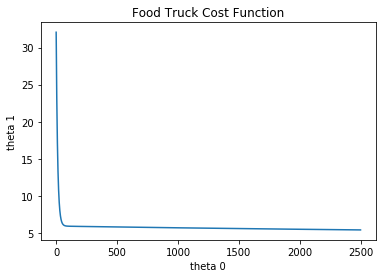

In [44]:
plt.plot(costs)
plt.title("Food Truck Cost Function")
plt.xlabel("theta 0")
plt.ylabel("theta 1")
plt.show()

Finally we plot our prediction line and our data points. The line represents the predicted profit for our food truck according to our input data.

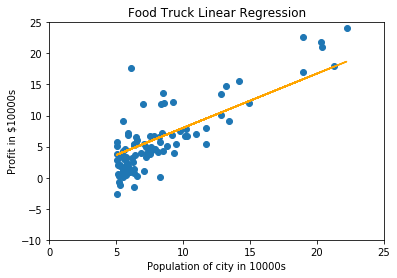

In [45]:
# plot gradient descent line and data points
line = X @ theta 
plt.scatter(X_withoutOnes, y)
plt.title("Food Truck Linear Regression")
plt.xlabel("Population of city in 10000s")
plt.ylabel("Profit in $10000s")
plt.xlim([0,25])
plt.ylim([-10,25])
plt.plot(X_withoutOnes, line, color = 'orange')
plt.show()

## Part 2 - Multivariate linear regression
Here we use multivariate linear regression to predict housing prices. We import the necessary libraries and initialize our variables. Note that we need our X vector to have its first column be all 1's, so we use np.insert to do just that. Theta needs to have the same number of columns as X (3 columns in this case). 

In [46]:
import os
import numpy as np
import struct
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# initalize variables 
costs = []
data = np.genfromtxt("housing_price_data.txt", delimiter=",")
m = data.shape[0]
X_column1 = data[:,[0]] # size of the house 
X_column2 = data[:,[1]] # number of bedrooms
X_withoutOnes = np.concatenate((X_column1,X_column2), axis=1)
X = np.insert(X_withoutOnes, 0, 1, axis=1)
y = data[:,2] # price of the house 
theta = np.zeros(X.shape[1])

Now we perform feature scaling on our data according to the equation:
$$x^{(i)}_{j}= \frac{x^{(i)}_{j}-\mu_{j}}{ s_{j}}$$

In [47]:
x_averages = np.mean(X, axis=0)
x_ranges = np.ptp(X, axis=0)
X[:,1] = (X[:,1] - x_averages[1]) / x_ranges[1]
X[:,2] = (X[:,2] - x_averages[2]) / x_ranges[2]

Our for loop will compute the cost function, compute the gradient, and then update our theta. The equations used respectively:
###### (cost function)
$$J(\theta) = {1 \over 2m} (\mathbf{X}\theta-y)^T(\mathbf{X}\theta-y)$$ 
###### (gradient)
$$\nabla J = {1 \over m} ((\mathbf{X^TX}\theta)-\mathbf{X^T}y)$$ 
###### (update parameters)
$$\theta = \theta - \alpha\nabla J$$

In [48]:
alpha = 0.0005
for i in range(0,2500):
    cost = 0
    # compute cost function
    cost = (1/(2*m) * np.matmul((np.matmul(X, theta) - y).transpose(), (np.matmul(X, theta) - y)))
    costs.append(cost)
    # compute gradient
    gradient = (1/m) * ( (X.transpose() @ X @ theta) - (X.transpose() @ y) )
    # update parameters
    theta = theta - (alpha*gradient)

Now we plot our cost function.

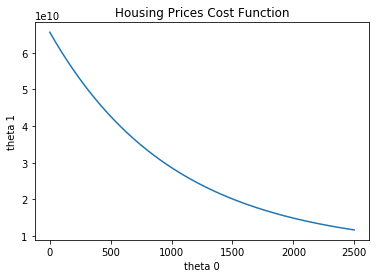

In [49]:
#plot cost function
plt.plot(costs)
plt.title("Housing Prices Cost Function")
plt.xlabel("theta 0")
plt.ylabel("theta 1")
plt.show()

Finally we plot our 3D prediction line.

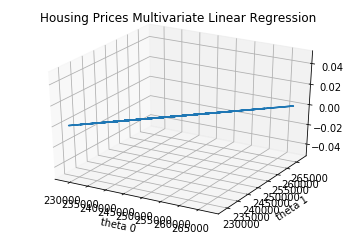

In [50]:
#3d graph
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = theta[0]
yline = theta[2] * X[:,2]
xline = theta[1] * X[:,1]
line = zline + yline + xline
plt.title("Housing Prices Multivariate Linear Regression")
plt.xlabel("theta 0")
plt.ylabel("theta 1")
ax.plot3D(line, line) 
plt.show()